In [ ]:
!pip install -q "transformers==4.56.2" "datasets==2.12.0" "accelerate" "evaluate" "sentencepiece" scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.0 MB/s eta 0:00:00


Loading JSON: /content/combined.json
Rows loaded: 5012
Labeled: 5012, Unlabeled: 0
Splits -> train: 3508, val: 752, test: 752
Loading tokenizer and model: google/bigbird-roberta-base


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizing splits...


Map:   0%|          | 0/3508 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

Map:   0%|          | 0/752 [00:00<?, ? examples/s]

Map:   0%|          | 0/752 [00:00<?, ? examples/s]

/tmp/ipython-input-2770673130.py:207: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Input ids are automatically padded from 956 to 960 to be a multiple of `config.block_size`: 64


Starting training (no in-training evaluation due to compatibility).


Step,Training Loss
50,1.369100
100,1.306600
150,1.038900
200,0.886900
250,0.828400
300,0.738800
350,0.740200
400,0.701100
450,0.833600
500,0.835500


Input ids are automatically padded from 961 to 1024 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 983 to 1024 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 1000 to 1024 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 988 to 1024 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 962 to 1024 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 764 to 768 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 1021 to 1024 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 914 to 960 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 909 to 960 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 929 to 960 to be a multiple of `config.block_size`: 64
Input ids are automatically padded from 93

Saving final model and tokenizer to: /content/bigbird_pokemon_fixed

Predicting: Train


Train acc: 0.8113
              precision    recall  f1-score   support

     Pikachu       0.91      0.71      0.80       913
   Charizard       0.75      0.84      0.79       879
   Bulbasaur       0.77      0.88      0.82       870
      Mewtwo       0.85      0.82      0.84       846

    accuracy                           0.81      3508
   macro avg       0.82      0.81      0.81      3508
weighted avg       0.82      0.81      0.81      3508


Predicting: Validation


Validation acc: 0.7952
              precision    recall  f1-score   support

     Pikachu       0.90      0.63      0.74       196
   Charizard       0.73      0.86      0.79       188
   Bulbasaur       0.78      0.89      0.83       186
      Mewtwo       0.82      0.81      0.81       182

    accuracy                           0.80       752
   macro avg       0.81      0.80      0.79       752
weighted avg       0.81      0.80      0.79       752


Predicting: Test


Test acc: 0.7553
              precision    recall  f1-score   support

     Pikachu       0.82      0.62      0.70       196
   Charizard       0.68      0.80      0.73       188
   Bulbasaur       0.76      0.82      0.79       187
      Mewtwo       0.79      0.79      0.79       181

    accuracy                           0.76       752
   macro avg       0.76      0.76      0.75       752
weighted avg       0.76      0.76      0.75       752



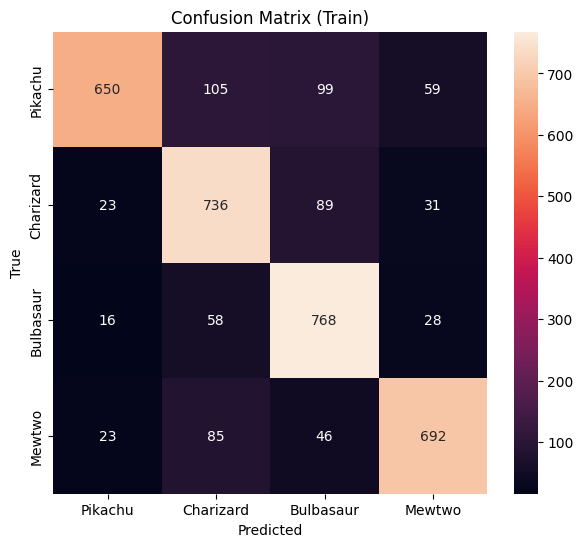

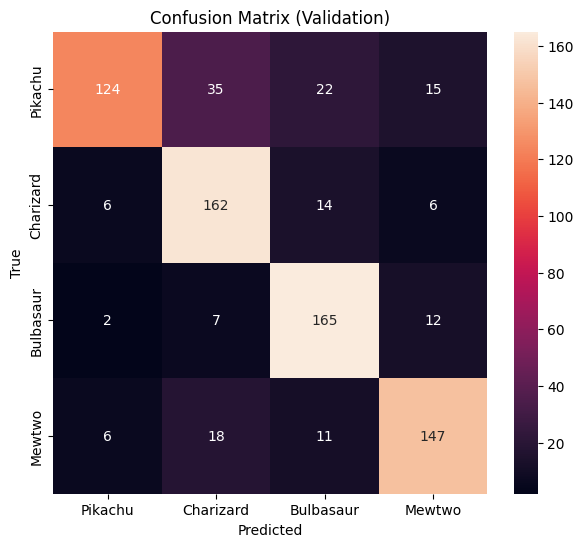

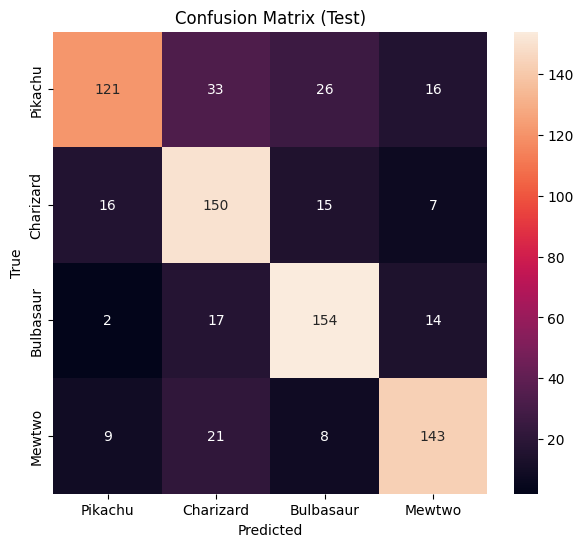

Done. Artifacts saved to: /content/bigbird_pokemon_fixed


In [ ]:
"""
Fixed: BigBird fine-tune script that avoids TrainingArguments kwargs incompatibilities.

Behavior:
- builds minimal TrainingArguments (very likely accepted across transformers versions)
- trains the model
- after training runs evaluation & predictions on train/val/test and plots confusion matrices
- saves model, tokenizer, and meta info

Note: This version does NOT do in-training evaluation or EarlyStopping (those require evaluation_strategy support).
If you want per-epoch evaluation + manual best-checkpoint saving, tell me and I'll add a safe epoch loop.
"""
# === Optional: pin/install packages on a fresh Colab runtime ===
# !pip install -q "transformers==4.56.2" "datasets==2.12.0" "accelerate" "evaluate" "sentencepiece" scikit-learn matplotlib seaborn

import os, json, random, traceback
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

from transformers import (
    AutoTokenizer, AutoConfig, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, DataCollatorWithPadding, set_seed
)
from datasets import Dataset, DatasetDict

In [ ]:
# -------------------- Config --------------------
DEBUG = False   # set True for quick debug (shorter length / fewer epochs)
MODEL_NAME = "google/bigbird-roberta-base"
SAVE_DIR = "/content/bigbird_pokemon_fixed"
os.makedirs(SAVE_DIR, exist_ok=True)

SEED = 42
set_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

NUM_LABELS = 4
if DEBUG:
    MAX_LENGTH = 256
    PER_DEVICE_BATCH = 2
    EPOCHS = 1
else:
    MAX_LENGTH = 1024
    PER_DEVICE_BATCH = 4
    EPOCHS = 3
LEARNING_RATE = 2e-5

CLASS_NAME_TO_ID = {'pikachu': 1, 'charizard': 2, 'bulbasaur': 3, 'mewtwo': 4}
ID_TO_CLASS_NAME = {v: k.capitalize() for k, v in CLASS_NAME_TO_ID.items()}

In [ ]:
# -------------------- JSON loader + label utils --------------------
def detect_label_column(obj):
    possible = ['label', 'class', 'class_id', 'target']
    for p in possible:
        if p in obj: return p
    for p in obj.keys():
        if p.lower() in possible: return p
    return None

def load_json_dataset(path):
    encodings = ['utf-8', 'utf-8-sig', 'cp1252', 'latin-1']
    data = None
    last_exc = None
    for enc in encodings:
        try:
            with open(path, 'r', encoding=enc) as f:
                data = json.load(f)
            if enc != 'utf-8':
                print(f"[load_json_dataset] fallback encoding used: {enc}")
            break
        except Exception as e:
            last_exc = e
    if data is None:
        raise last_exc

    if isinstance(data, dict):
        for k in ['data','items','examples','instances']:
            if k in data and isinstance(data[k], list):
                data = data[k]; break

    if not isinstance(data, list):
        raise ValueError("JSON must be a list (or dict with list under data/items)")

    rows = []
    label_key = detect_label_column(data[0]) if len(data)>0 else None
    for obj in data:
        image_id = obj.get('image_id') or obj.get('id') or obj.get('img_id') or obj.get('image')
        prompt = obj.get('prompt') or obj.get('text') or obj.get('order') or obj.get('instruction')
        if prompt is None:
            strings = [(k,v) for k,v in obj.items() if isinstance(v, str)]
            if strings:
                prompt = max(strings, key=lambda t: len(t[1]))[1]
        label_raw = obj.get(label_key) if label_key else None
        rows.append({'image_id': image_id, 'prompt': prompt, 'label_raw': label_raw, 'raw_obj': obj})
    return pd.DataFrame(rows)

In [ ]:
def normalize_label(lbl):
    import pandas as pd
    if pd.isna(lbl): return None
    try:
        if isinstance(lbl,(int,float)) and not isinstance(lbl,bool):
            v=int(lbl)
            if v in ID_TO_CLASS_NAME: return v
    except Exception:
        pass
    if isinstance(lbl,str):
        s=lbl.strip().lower()
        if s.isdigit():
            v=int(s)
            if v in ID_TO_CLASS_NAME: return v
        s2=''.join(ch for ch in s if ch.isalnum() or ch.isspace())
        if s2 in CLASS_NAME_TO_ID: return CLASS_NAME_TO_ID[s2]
        first = s2.split()[0] if s2 else ''
        if first in CLASS_NAME_TO_ID: return CLASS_NAME_TO_ID[first]
    return None

In [ ]:
# -------------------- Prepare datasets --------------------
def prepare_datasets(json_path):
    print("Loading JSON:", json_path)
    df = load_json_dataset(json_path)
    print("Rows loaded:", len(df))
    df = df[df['prompt'].notna()].copy()
    df['label_id'] = df['label_raw'].apply(normalize_label)
    labelled = df[df['label_id'].notna()].copy()
    unlabeled = df[df['label_id'].isna()].copy()
    print(f"Labeled: {len(labelled)}, Unlabeled: {len(unlabeled)}")
    if len(labelled)==0:
        raise ValueError("No labeled rows found.")
    labelled['y'] = labelled['label_id'].map(lambda x: x-1)
    train_val, test = train_test_split(labelled, test_size=0.15, random_state=SEED, stratify=labelled['y'])
    train, val = train_test_split(train_val, test_size=0.17647, random_state=SEED, stratify=train_val['y'])
    print(f"Splits -> train: {len(train)}, val: {len(val)}, test: {len(test)}")
    return DatasetDict({
        'train': Dataset.from_pandas(train.reset_index(drop=True)),
        'validation': Dataset.from_pandas(val.reset_index(drop=True)),
        'test': Dataset.from_pandas(test.reset_index(drop=True))
    })

# -------------------- Tokenize --------------------
def tokenize_batch(examples, tokenizer, text_column='prompt', max_length=MAX_LENGTH):
    texts = [ (t if (t is not None) else "") for t in examples[text_column] ]
    return tokenizer(texts, truncation=True, padding=False, max_length=max_length)

In [ ]:
# -------------------- metrics --------------------
def compute_metrics_fn(pred):
    logits = pred.predictions
    if isinstance(logits, tuple): logits = logits[0]
    preds = np.argmax(logits, axis=1)
    labels = pred.label_ids
    acc = accuracy_score(labels, preds)
    p,r,f1,_ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)
    return {"accuracy": acc, "precision_macro": p, "recall_macro": r, "f1_macro": f1}

In [ ]:
# -------------------- Main pipeline (minimal TrainingArguments) --------------------
def run_fixed_bigbird(json_path="/content/combined.json", save_dir=SAVE_DIR,
                      model_name=MODEL_NAME, num_labels=NUM_LABELS, max_length=MAX_LENGTH,
                      per_device_batch=PER_DEVICE_BATCH, epochs=EPOCHS, lr=LEARNING_RATE, fp16=True):

    ds = prepare_datasets(json_path)

    print("Loading tokenizer and model:", model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
    config = AutoConfig.from_pretrained(model_name, num_labels=num_labels,
                                        id2label={i: ID_TO_CLASS_NAME[i+1] for i in range(num_labels)},
                                        label2id={ID_TO_CLASS_NAME[i+1].lower(): i for i in range(num_labels)})
    model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)

    # Tokenize
    print("Tokenizing splits...")
    tokenized = {}
    for split in ['train','validation','test']:
        cols = ds[split].column_names
        keep = ['prompt','y']
        remove_cols = [c for c in cols if c not in keep]
        tokenized[split] = ds[split].map(lambda ex: tokenize_batch(ex, tokenizer, text_column='prompt', max_length=max_length),
                                         batched=True, remove_columns=remove_cols)
        if 'y' in tokenized[split].column_names:
            tokenized[split] = tokenized[split].rename_column('y','labels')
        tokenized[split].set_format(type='torch')

    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

    # Build minimal TrainingArguments (avoid evaluation_strategy/save_strategy that caused errors)
    training_args = TrainingArguments(
        output_dir=save_dir,
        overwrite_output_dir=True,
        per_device_train_batch_size=per_device_batch,
        per_device_eval_batch_size=max(1, per_device_batch*2),
        num_train_epochs=epochs,
        learning_rate=lr,
        weight_decay=0.01,
        logging_steps=50,
        save_total_limit=2,
        fp16=(torch.cuda.is_available() and fp16),
        seed=SEED,
        disable_tqdm=False,
        report_to="none",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized['train'],
        eval_dataset=tokenized['validation'],  # eval_dataset is set but trainer won't auto-eval w/o evaluation_strategy
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics_fn
    )

    # Train (no in-training eval)
    try:
        print("Starting training (no in-training evaluation due to compatibility).")
        train_result = trainer.train()
    except Exception:
        print("Training failed; printing traceback:")
        traceback.print_exc()
        raise

    # Save final model & tokenizer
    print("Saving final model and tokenizer to:", save_dir)
    trainer.save_model(save_dir)
    tokenizer.save_pretrained(save_dir)
    try:
        metrics = train_result.metrics
        with open(os.path.join(save_dir, "train_metrics.json"), "w") as f:
            json.dump(metrics, f, indent=2)
    except Exception as e:
        print("Warning: couldn't save train metrics:", e)

    # ---------- Post-training evaluation (train / val / test) ----------
    def predict_and_eval(name, tokenized_dataset):
        print(f"\nPredicting: {name}")
        out = trainer.predict(tokenized_dataset)
        logits = out.predictions
        if isinstance(logits, tuple): logits = logits[0]
        probs = torch.softmax(torch.from_numpy(logits), dim=1).numpy()
        preds = probs.argmax(axis=1)
        labels = out.label_ids
        acc = accuracy_score(labels, preds)
        report = classification_report(labels, preds, target_names=[ID_TO_CLASS_NAME[i+1] for i in range(num_labels)])
        cm = confusion_matrix(labels, preds)
        print(f"{name} acc: {acc:.4f}")
        print(report)
        return {'acc': acc, 'report': report, 'cm': cm, 'labels': labels, 'preds': preds, 'probs': probs}

    results_train = predict_and_eval('Train', tokenized['train'])
    results_val = predict_and_eval('Validation', tokenized['validation'])
    results_test = predict_and_eval('Test', tokenized['test'])

    # Plot confusion matrices
    def plot_cm(cm, title):
        plt.figure(figsize=(7,6))
        sns.heatmap(cm, annot=True, fmt='d',
                    xticklabels=[ID_TO_CLASS_NAME[i+1] for i in range(num_labels)],
                    yticklabels=[ID_TO_CLASS_NAME[i+1] for i in range(num_labels)])
        plt.xlabel('Predicted'); plt.ylabel('True'); plt.title(title); plt.show()

    plot_cm(results_train['cm'], 'Confusion Matrix (Train)')
    plot_cm(results_val['cm'], 'Confusion Matrix (Validation)')
    plot_cm(results_test['cm'], 'Confusion Matrix (Test)')

    # Save meta
    meta = {
        'model_name': model_name,
        'save_dir': save_dir,
        'class_id_to_name': ID_TO_CLASS_NAME,
        'class_name_to_id': CLASS_NAME_TO_ID,
        'max_length': max_length,
        'training_args': {'per_device_train_batch_size': per_device_batch, 'epochs': epochs, 'learning_rate': lr}
    }
    with open(os.path.join(save_dir, "meta.json"), "w") as f:
        json.dump(meta, f, indent=2)

    print("Done. Artifacts saved to:", save_dir)
    return {'trainer': trainer, 'results': {'train': results_train, 'val': results_val, 'test': results_test}, 'save_dir': save_dir}

In [ ]:
# -------------------- Run --------------------
if __name__ == "__main__":
    try:
        out = run_fixed_bigbird(json_path="/content/combined.json", save_dir=SAVE_DIR)
    except Exception:
        print("ERROR during run:")
        traceback.print_exc()

In [ ]:
!zip -r /content/bigbird_pokemon_fixed.zip /content/bigbird_pokemon_fixed

  adding: content/bigbird_pokemon_fixed/ (stored 0%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/ (stored 0%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/model.safetensors (deflated 7%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/scheduler.pt (deflated 61%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/training_args.bin (deflated 53%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/scaler.pt (deflated 64%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/optimizer.pt (deflated 26%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/config.json (deflated 53%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/rng_state.pth (deflated 27%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/tokenizer_config.json (deflated 94%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/tokenizer.json (deflated 90%)
  adding: content/bigbird_pokemon_fixed/checkpoint-2500/trainer_state.json (deflated 74%)
  adding: conte

In [ ]:
"""
Inference script: Use fine-tuned BigBird model to predict labels for a new JSON file.

Requires:
 - a trained model directory (SAVE_DIR from training)
 - a new JSON dataset (similar structure: has 'prompt' or other text fields)

Outputs:
 - predictions with probabilities
 - saves CSV with columns: image_id, prompt, predicted_class, probs
"""

import os, json, traceback
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset
from torch.nn.functional import softmax

# -------------------- Config --------------------
MODEL_DIR = "/content/bigbird_pokemon_fixed"   # path where you saved model
NEW_JSON = "/content/test_prompts_orders.json"            # new input JSON file
OUTPUT_CSV = "/content/new_predictions.csv"

# -------------------- Load meta --------------------
with open(os.path.join(MODEL_DIR, "meta.json"), "r") as f:
    meta = json.load(f)

id_to_class = {int(k): v for k,v in meta["class_id_to_name"].items()}
class_to_id = meta["class_name_to_id"]
max_length = meta.get("max_length", 512)

# -------------------- Load model + tokenizer --------------------
print("Loading model from:", MODEL_DIR)
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# -------------------- Load new JSON --------------------
def detect_label_column(obj):
    possible = ['label', 'class', 'class_id', 'target']
    for p in possible:
        if p in obj: return p
    for p in obj.keys():
        if p.lower() in possible: return p
    return None

def load_json_dataset(path):
    encodings = ['utf-8', 'utf-8-sig', 'cp1252', 'latin-1']
    data = None
    last_exc = None
    for enc in encodings:
        try:
            with open(path, "r", encoding=enc) as f:
                data = json.load(f)
            if enc != 'utf-8':
                print(f"[load_json_dataset] fallback encoding used: {enc}")
            break
        except Exception as e:
            last_exc = e
    if data is None:
        raise last_exc

    if isinstance(data, dict):
        for k in ['data','items','examples','instances']:
            if k in data and isinstance(data[k], list):
                data = data[k]
                break

    if not isinstance(data, list):
        raise ValueError("JSON must be a list (or dict with list under 'data/items').")

    rows = []
    label_key = detect_label_column(data[0]) if len(data) > 0 else None
    for obj in data:
        image_id = obj.get('image_id') or obj.get('id') or obj.get('img_id') or obj.get('image')
        prompt = obj.get('prompt') or obj.get('text') or obj.get('order') or obj.get('instruction')
        if prompt is None:
            strings = [(k,v) for k,v in obj.items() if isinstance(v,str)]
            if strings:
                prompt = max(strings, key=lambda t: len(t[1]))[1]
        rows.append({'image_id': image_id, 'prompt': prompt, 'raw_obj': obj})
    return pd.DataFrame(rows)

print("Loading new JSON:", NEW_JSON)
df_new = load_json_dataset(NEW_JSON)
print("Rows loaded:", len(df_new))

# -------------------- Predict --------------------
pred_labels = []
pred_probs = []

batch_size = 8
for i in range(0, len(df_new), batch_size):
    batch_prompts = df_new['prompt'].iloc[i:i+batch_size].fillna("").tolist()
    enc = tokenizer(batch_prompts, truncation=True, padding=True, max_length=max_length, return_tensors="pt").to(device)
    with torch.no_grad():
        logits = model(**enc).logits
        probs = softmax(logits, dim=1).cpu().numpy()
        preds = probs.argmax(axis=1)
    pred_labels.extend(preds)
    pred_probs.extend(probs)

df_new["pred_class_id"] = [int(x) for x in pred_labels]
df_new["pred_class_name"] = [id_to_class[x+1] for x in pred_labels]  # +1 because training labels were 0-based
df_new["probs"] = pred_probs

# -------------------- Save --------------------
df_out = df_new[["image_id", "prompt", "pred_class_id", "pred_class_name", "probs"]]
df_out.to_csv(OUTPUT_CSV, index=False)
print("Predictions saved to:", OUTPUT_CSV)
print(df_out.head())


Loading model from: /content/bigbird_pokemon_fixed


Input ids are automatically padded from 707 to 768 to be a multiple of `config.block_size`: 64


Loading new JSON: /content/test_prompts_orders.json
[load_json_dataset] fallback encoding used: cp1252
Rows loaded: 200


Attention type 'block_sparse' is not possible if sequence_length: 702 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 704 with config.block_size = 64, config.num_random_blocks = 3. Changing attention type to 'original_full'...


Predictions saved to: /content/new_predictions.csv
        image_id                                             prompt  \
0  img_00000.png  HQ REPORT: Situation analysis regarding unusua...   
1  img_00001.png  HQ REPORT: Situation analysis regarding unusua...   
2  img_00002.png  HQ REPORT: Situation analysis regarding unusua...   
3  img_00003.png  HQ REPORT: Situation analysis regarding unusua...   
4  img_00004.png  HQ REPORT: Situation analysis regarding unusua...   

   pred_class_id pred_class_name  \
0              0         Pikachu   
1              1       Charizard   
2              2       Bulbasaur   
3              1       Charizard   
4              3          Mewtwo   

                                               probs  
0  [0.9936365, 0.002156729, 0.0023770097, 0.00182...  
1  [0.013395523, 0.96497446, 0.010525377, 0.01110...  
2  [0.021368397, 0.019414274, 0.95248795, 0.00672...  
3  [0.012746595, 0.9648921, 0.011734513, 0.010626...  
4  [0.015481493, 0.007712712, 

In [ ]:
import pandas as pd

# Paths
OUTPUT_CSV = "/content/new_predictions.csv"
OUTPUT_JSON = "/content/google_big_bird_pred.json"

# Load the CSV
df_out = pd.read_csv(OUTPUT_CSV)

# Convert to JSON (records format is convenient for lists of objects)
df_out.to_json(OUTPUT_JSON, orient="records", indent=2)

print("Predictions saved to JSON:", OUTPUT_JSON)

Predictions saved to JSON: /content/google_big_bird_pred.json
